In [ ]:
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('dato.csv')
print("Cantidad de datos: " + str(df.shape[0]))
print("Columnas: " + str(df.columns.values))
df[df.columns.values[:3]].astype('string')
df[df.columns.values[3:8]].astype('float')
df[df.columns.values[8:]].astype('string')
df#pd.to_numeric(train['NA_Sales'][6136])

Cantidad de datos: 7112
Columnas: ['Platform' 'Genre' 'Publisher' 'NA_Sales' 'EU_Sales' 'JP_Sales'
 'Other_Sales' 'Global_Sales' 'Rating' 'Critic_Score_Class']


,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Rating,Critic_Score_Class
0,Wii,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,E,Bueno
1,Wii,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,E,Excelente
2,Wii,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,E,Excelente
3,DS,Platform,Nintendo,11.28,9.15,6.50,2.88,29.81,E,Excelente
4,Wii,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,E,Malo
...,...,...,...,...,...,...,...,...,...,...
7107,PC,Action,Ubisoft,0.00,0.00,0.00,0.00,0.01,T,Excelente
7108,PC,Shooter,Midway Games,0.00,0.00,0.00,0.00,0.01,T,Aceptable
7109,PC,Sports,Sega,0.00,0.00,0.00,0.00,0.01,E,Aceptable
7110,PC,Strategy,Take-Two Interactive,0.00,0.00,0.00,0.00,0.01,E10+,Aceptable


In [ ]:
col_names = ['Platform','Genre','Rating', 'Critic_Score_Class']
stats = {}
#stats = dict(nombre_cont)
for name in col_names:
  stats[name] = {}
  aux = df[[name,'Global_Sales']].groupby(name).count()
  for row in aux.iloc:
    stats[name][row.name] = row.values[0]
stats

#keys = stats.keys()
#x={}
#ls = ['a','b']
#for l in ls:
#  x[l] = 1
#x
#for nombre in nombre_cont:


#pltf.groupby(level=0).mean()

{'Critic_Score_Class': {'Aceptable': 1698,
  'Bueno': 1957,
  'Excelente': 1997,
  'Malo': 1460},
 'Genre': {'Action': 1698,
  'Adventure': 260,
  'Fighting': 392,
  'Misc': 399,
  'Platform': 412,
  'Puzzle': 127,
  'Racing': 600,
  'Role-Playing': 739,
  'Shooter': 900,
  'Simulation': 312,
  'Sports': 981,
  'Strategy': 292},
 'Platform': {'3DS': 161,
  'DC': 14,
  'DS': 472,
  'GBA': 249,
  'GC': 363,
  'PC': 734,
  'PS': 154,
  'PS2': 1169,
  'PS3': 790,
  'PS4': 255,
  'PSP': 401,
  'PSV': 125,
  'Wii': 493,
  'WiiU': 89,
  'X': 586,
  'X360': 888,
  'XOne': 169},
 'Rating': {'AO': 1,
  'E': 2162,
  'E10+': 968,
  'K-A': 1,
  'M': 1489,
  'RP': 2,
  'T': 2489}}

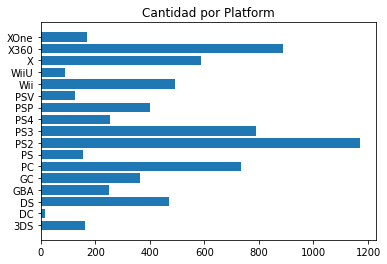

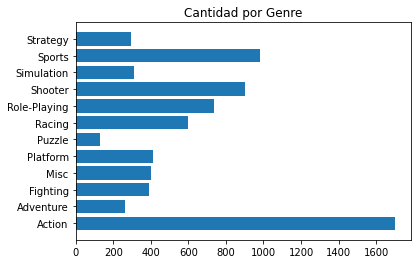

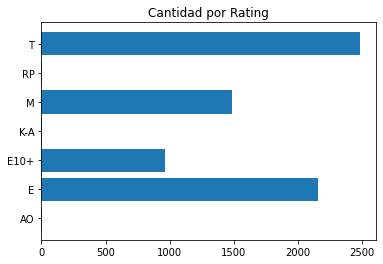

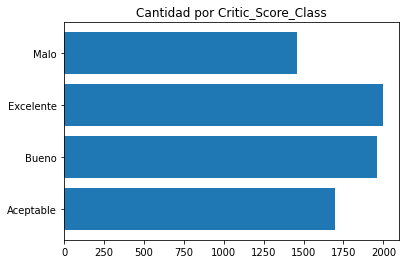

In [ ]:
for name in col_names:
  plt.title("Cantidad por "+name)
  plt.barh(list(stats[name].keys()), stats[name].values())
  #plt.xticks(range(len(stats[name].keys())))
  plt.show()

In [ ]:
train = pd.read_csv('FinalDF.csv')
train['KMEANS-prediction']

0       2
1       2
2       0
3       0
4       2
       ..
4946    0
4947    5
4948    5
4949    2
4950    2
Name: KMEANS-prediction, Length: 4951, dtype: int64

In [ ]:
col_names_pred = list(train.keys()[-3:])
stats_pred = {}
#stats = dict(nombre_cont)
for name in col_names_pred:
  stats_pred[name] = {}
  aux = train[[name,'Global_Sales']].groupby(name).count()
  for row in aux.iloc:
    stats_pred[name][row.name] = row.values[0]
stats_pred

{'BisKMeans-prediction': {0: 3574,
  1: 927,
  2: 321,
  3: 88,
  4: 25,
  5: 10,
  6: 5,
  7: 1},
 'GMM-prediction': {0: 1304,
  1: 596,
  2: 125,
  3: 1987,
  4: 48,
  5: 486,
  6: 327,
  7: 78},
 'KMEANS-prediction': {0: 1061,
  1: 7,
  2: 3267,
  3: 163,
  4: 1,
  5: 382,
  6: 23,
  7: 47}}

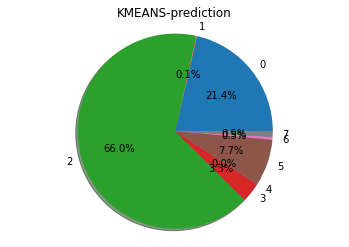

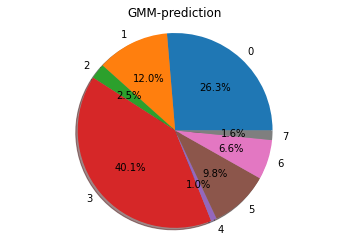

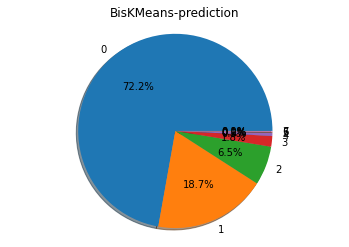

In [ ]:
for name in col_names_pred:
  plt.title(name)
  plt.pie(list(stats_pred[name].values()), labels=list(stats_pred[name].keys())
          ,autopct='%1.1f%%', shadow=True)
  #plt.xticks(range(len(stats[name].keys())))
  plt.axis('equal')
  plt.show()

In [ ]:
df_mod = df['Platform','Genre','Rating', 'Critic_Score_Class']
pltf = df.groupby(['Platform','Genre','Rating', 'Critic_Score_Class'])
pltf.count()

In [ ]:
col_names = train.columns.values[2:]
contadores = []
for col_name in col_names:
  contadores.append(train[col_name].sum())

#train['identity_hate'].sum()

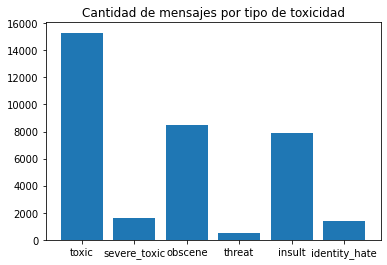

In [ ]:
plt.title("Cantidad de mensajes por tipo de toxicidad")
plt.bar(col_names, contadores)
plt.xticks(col_names)
plt.show()

In [ ]:
frecuencia = np.zeros(7)
x = list(range(7))
print(train.iloc[0][2:].sum())
for i in range(train.shape[0]):
  suma = train.iloc[i][2:].sum()
  frecuencia[suma]+=1
  #print(train[i])

0


In [ ]:
print(frecuencia)
x = col_names.copy()
x = np.insert(x,0,'no toxico')
x = range(7)
print(x)

[1.43346e+05 6.36000e+03 3.48000e+03 4.20900e+03 1.76000e+03 3.85000e+02
 3.10000e+01]
range(0, 7)


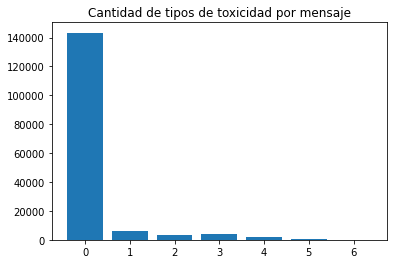

In [ ]:
plt.title("Cantidad de tipos de toxicidad por mensaje")
plt.bar(x, frecuencia)
plt.xticks(x)
plt.show()

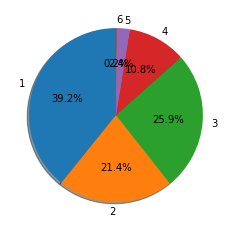

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(frecuencia[1:], labels=x[1:], autopct='%1.1f%%',
        shadow=True, startangle=90)
#ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

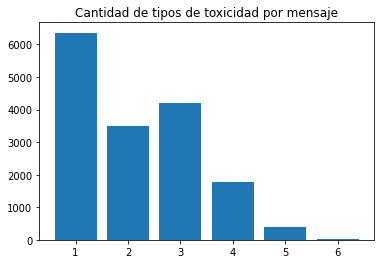

In [ ]:
plt.title("Cantidad de tipos de toxicidad por mensaje")
plt.bar(x[1:], frecuencia[1:])
plt.xticks(x[1:])
plt.show()